<img src='Imagens/logon.jpg' width="400px" align="center">


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import random
from random import shuffle
import pandas as pd

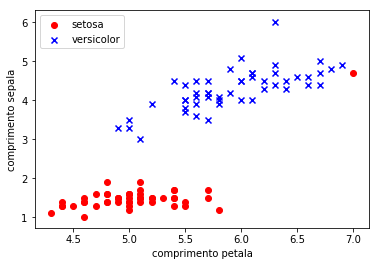

In [10]:
# ----- Acessando os dados: -----

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data') # usar o pandas para acessar dados online

y = df.iloc[0:20, 3].values
X = df.iloc[0:100, [0, 2]].values

# Amostragem após 50 pertence a Iris-versicolor
plt.scatter(X[:50, 0], X[:50, 1],color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='x', label='versicolor')
plt.xlabel('comprimento petala')
plt.ylabel('comprimento sepala')
plt.legend(loc='upper left')
plt.show() 

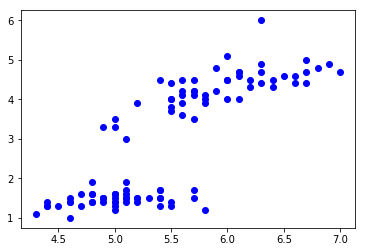

originais: wa0= 0.4 |wb0= 0.5
ym = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
yr = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


In [4]:
# ----- Pre-processamento: -----

# scatterplot; dado não discriminado:
plt.plot(X[:,0],X[:,1],'ob')
plt.show()

# definindo parâmetros:

semente = 4
teta = 1.5 # valor padrão de teta
random.seed(semente) # Pseudo aleatório (seed)

yr = [] # y real, 1 e setosa e -1 e versicolor

for i in range (len(X[:,0])):
  if i <= 50: # 50, aonde se define se é setosa ou versicolor (>= 50 é versicolor devido ao arranjo dos dados)
    a = 1  # setosa
  else:
    a = -1 # versicolor
  yr.append(a)

wa0 = 0.1*random.randrange(1, 9,1);
wb0 = 0.1*random.randrange(1, 9,1);

print("originais:",'wa0=',wa0,'|wb0=',wb0)

ym = [] # y modelo, inicial = tudo setosa
for i in range(len(X[:,0])): # Primeiro passo isolado de treino
  z0 = wa0*X[:,0][i] + wb0*X[:,1][i] # calculo de Z

  if z0 >= teta: # calculo de ym
    ym0 = 1
  else:
    ym0 = -1
    
  ym.append(ym0)
  
print('ym =',ym)
print('yr =',yr)

In [5]:
# ----- Treino: -----
random.seed(semente) # Pseudo aleatório (seed)

wa0 = 0.1*random.randrange(1, 9,1); 
wb0 = 0.1*random.randrange(1, 9,1); # Valores repetidos nesta celula para evitar o re-treinamento indevido.

rr = [] # vetor aleatorio de indices (como os indices variam de 0 ate 148, e como so variam depois de 50,
        # foi implementado um vetor de indices aleatorios para efetivar o treinamento)
  
for i in range(len(yr)):
  rr.append(random.randrange(0, len(yr)-1,1))

for i in rr: # para o indice aleatorio I:
  for j in range(10): # para um minimo de interações locais 10:
    z0 = wa0*X[:,0][i] + wb0*X[:,1][i] # calculo de z
      
    if z0 >= teta: # calculo de ym
      ym0 = 1
    else:
      ym0 = -1

    Dwa = 0.3*(yr[i] - ym0)*X[:,0][i]; # calculo de Delta w (entrada de dados das pétalas)
    Dwb = 0.3*(yr[i] - ym0)*X[:,1][i]; # calculo de Delta w (entrada de dados das sépalas)

    wa0 += Dwa # update das ponderações
    wb0 += Dwb

print("ponderações perceptron",'wa0=',wa0,'|wb0=',wb0)

# ----- Teste do novo modelo (novas ponderações): -----
    
ymm = [] # novo modelo
for i in range(len(X[:,0])):
  z0 = wa0*X[:,0][i] + wb0*X[:,1][i] # novo modelo, admite qualquer valor de x1 ou x2 e define se é setosa ou versicolor

  if z0 >= teta: # mesmo teta
    ym0 = 1
  else:
    ym0 = -1
    
  ymm.append(ym0)
  


print('ymm =',ymm)
print('yro =',yr)

ponderações perceptron wa0= 3.16 |wb0= -6.4
ymm = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
yro = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


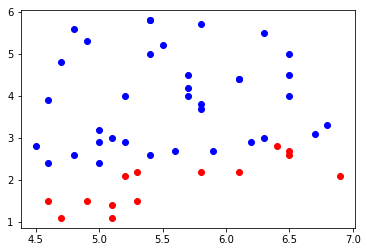

In [6]:
# Teste com dados sintéticos:
# 4.5 a 7.0
# 1.0 a 6.0

random.seed(semente) # Pseudo aleatório (seed)
x1 = []
x2 = []
for i in range(50):
  x1.append(0.1*random.randrange(45, 70,1))
  x2.append(0.1*random.randrange(10, 60,1))

  
yms = [] 
for i in range(len(x1)):
  z0 = wa0*x1[i] + wb0*x2[i]

  if z0 >= teta:
    ym0 = 1
  else:
    ym0 = -1
    
  yms.append(ym0)
  
for i in range(len(x1)):
  if yms[i] == 1:
    plt.plot(x1[i],x2[i],'or')
  if yms[i] == -1:
    plt.plot(x1[i],x2[i],'ob')
    
plt.show()